In [1]:
# reticulate 
reticulate::use_python("/home/jingzh/.conda/envs/spaco_dev/bin/python")

### following Seurat's tutorial

In [2]:
# following Seurat's tutorial
library(Seurat)
library(SeuratData)
library(ggplot2)
library(patchwork)
library(dplyr)

library(reticulate)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

── Installed datasets ───────────────────────────────────── SeuratData v0.2.2 ──

✔ stxBrain 0.1.1                        


────────────────────────────────────── Key ─────────────────────────────────────

✔ Dataset loaded successfully
❯ Dataset built with a newer version of Seurat than installed
❓ Unknown version of Seurat installed



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    i

In [3]:
# Uncomment the following line if download is needed
# InstallData("stxBrain")

brain <- LoadData("stxBrain", type = "anterior1")

brain <- SCTransform(brain, assay = "Spatial", verbose = FALSE)

brain <- RunPCA(brain, assay = "SCT", verbose = FALSE)
brain <- FindNeighbors(brain, reduction = "pca", dims = 1:30)
brain <- FindClusters(brain, verbose = FALSE)
brain <- RunUMAP(brain, reduction = "pca", dims = 1:30)

Computing nearest neighbor graph

Computing SNN

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:29:50 UMAP embedding parameters a = 0.9922 b = 1.112

17:29:50 Read 2696 rows and found 30 numeric columns

17:29:50 Using Annoy for neighbor search, n_neighbors = 30

17:29:50 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:29:51 Writing NN index file to temp file /tmp/RtmpSk93xZ/file8f7c136ec6f9d

17:29:51 Searching Annoy index using 1 thread, search_k = 3000

17:29:52 Annoy recall = 100%

17:29:52 Commencing smooth kNN distance cal

### Seurat's default plot

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


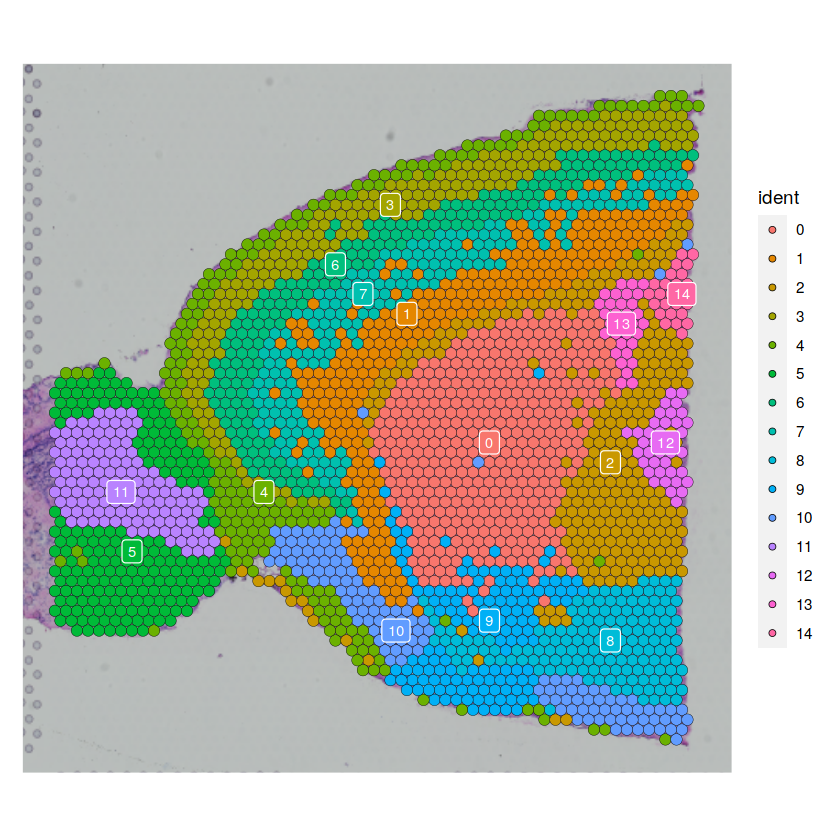

In [4]:
p2 <- SpatialDimPlot(brain, label = TRUE, label.size = 3)
p2

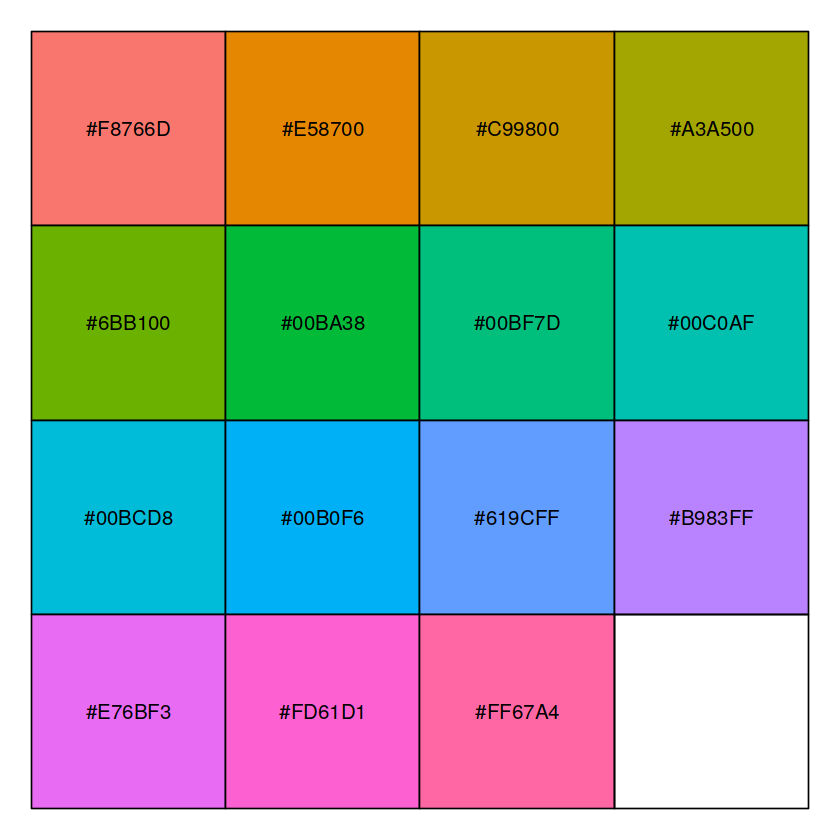

In [5]:
# Any palette you wish!
palette_default = scales::hue_pal()(15)

scales::show_col(palette_default)

In [6]:
coor = c(
        as.integer(brain@images$anterior1@coordinates$col),
        as.integer(brain@images$anterior1@coordinates$row)
)
dim(coor) = c(dim(brain)[2],2)

# observe the range of coordinate for adjustment of radius
c(min(coor[,1]), max(coor[,1]))
c(min(coor[,2]), max(coor[,2]))

[1]   0 117

[1] 10 75

In [21]:
spaco = import("spaco")
numpy = import("numpy")
color_mapping = spaco$colorize(
    cell_coordinates=numpy$array(coor),
    cell_labels=numpy$array(brain$seurat_clusters),
    colorblind_type="none",
    radius=20,
    n_neighbors=as.integer(50),
    palette=palette_default,
)
color_mapping

$`0`
[1] "#6BB100"

$`1`
[1] "#E58700"

$`10`
[1] "#619CFF"

$`11`
[1] "#00BA38"

$`12`
[1] "#F8766D"

$`13`
[1] "#FF67A4"

$`14`
[1] "#00BF7D"

$`2`
[1] "#00B0F6"

$`3`
[1] "#00C0AF"

$`4`
[1] "#C99800"

$`5`
[1] "#E76BF3"

$`6`
[1] "#FD61D1"

$`7`
[1] "#00BCD8"

$`8`
[1] "#A3A500"

$`9`
[1] "#B983FF"

### Spaco's color assignment

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


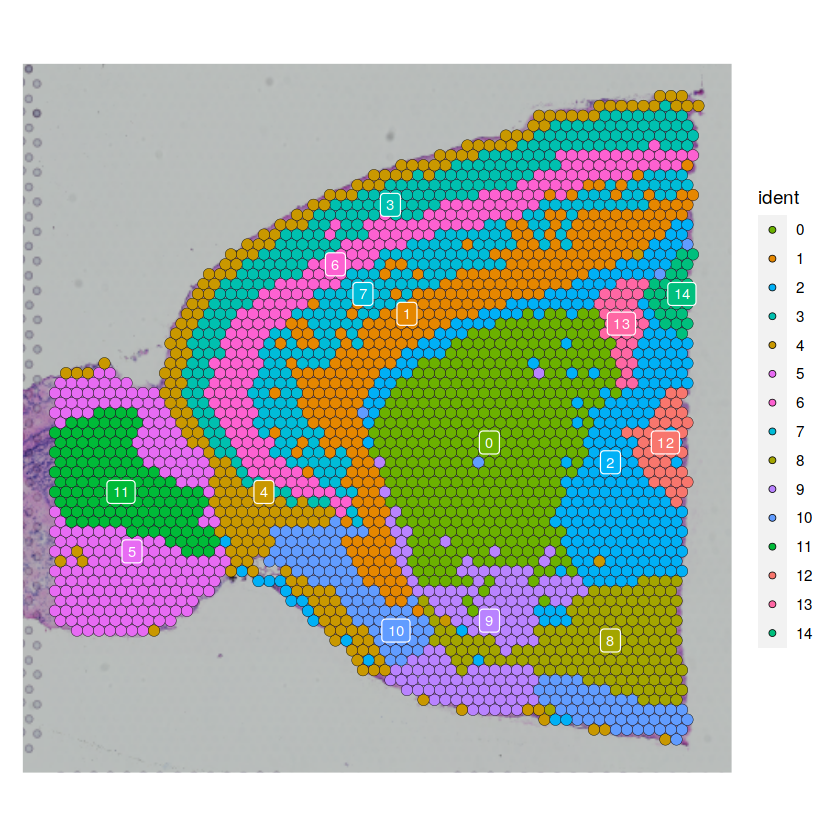

In [22]:
p2 <- SpatialDimPlot(brain, label = TRUE, label.size = 3, cols = unlist(color_mapping))
p2